In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

In [2]:
np.random.seed(42)


In [3]:
def f_x(xx, yy):
    return ((np.cos(2*np.pi*xx)/(1-(4*xx)**2))*(np.sin(np.pi*xx)/(np.pi*xx)))*((np.cos(2*np.pi*yy)/(1-(4*yy)**2))*(np.sin(np.pi*yy)/(np.pi*yy)))

def generate_array(size):
    
    #n = np.linspace(-4*np.pi, 4*np.pi, size)
    n = np.linspace(-np.pi, np.pi, size)
    x, y = np.meshgrid(n, n)
    
    z = f_x(x, y)

    X = np.ravel(x)
    Y = np.ravel(y)
    Z = np.ravel(z)
    
    dt = np.c_[X, Y]
    dt = np.c_[dt, Z]
    #np.random.shuffle(dt)
    return dt

In [4]:
from keras import models, layers

Using TensorFlow backend.


In [5]:
dt_train = generate_array(100)
dt_val = generate_array(50)

#in_array, out_array = dt[:,:2], dt[:,2]

#X_train, Y_train = in_array[:7500], out_array[:7500]
X_train, Y_train = dt_train[:,:2], dt_train[:,2]
#X_val, Y_val = in_array[7500:], out_array[7500:]
X_val, Y_val = dt_val[:,:2], dt_val[:,2]

net = models.Sequential()
net.add(layers.Dense(8, activation='tanh', input_shape=(2,)))
net.add(layers.Dense(8, activation='tanh'))
net.add(layers.Dense(1))

net.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
print("Fitting")
history = net.fit(X_train, Y_train, epochs=15, batch_size=10, validation_data=(X_val, Y_val), verbose=0)
print("Finished")

Instructions for updating:
Colocations handled automatically by placer.
Fitting
Instructions for updating:
Use tf.cast instead.
Finished


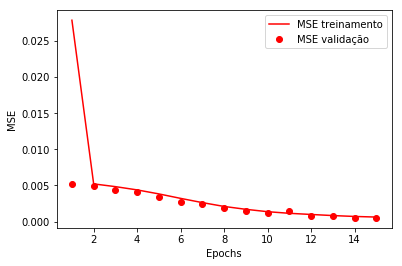

In [6]:
loss = history.history['loss']
val_loss = history.history["val_loss"]

acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']

epochs = range(1, len(loss)+1)

#fig, (ax1, ax2) = plt.subplots(2,1)
plt.figure()
# ax1.plot(epochs, loss, 'b-', label='Training loss')
# ax1.plot(epochs, val_loss, 'bo', label='Validation loss')
# ax1.set_xlabel('Epochs')
# ax1.set_ylabel('Loss')
# ax1.legend()

plt.plot(epochs, acc, 'r-', label='MSE treinamento')
plt.plot(epochs, val_acc, 'ro', label='MSE validação')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.savefig('/home/martins/fig_7b_epochs.png')
plt.show()

### Predicting

In [7]:
pred = net.predict(X_train)

np.savetxt("result_7b.csv", np.c_[dt_train, pred], delimiter=',')

# dimen = int(np.sqrt(len(X_train)))
# fig = plt.figure()

# ax = fig.gca(projection='3d')
# ax.plot_surface(dt_train[:,0].reshape(dimen, -1), dt_train[:,1].reshape(dimen, -1), Y_train.reshape(dimen, -1), alpha=0.5, label='Original')
# ax.plot_surface(dt_train[:,0].reshape(dimen, -1), dt_train[:,1].reshape(dimen, -1), pred.reshape(dimen, -1), alpha=0.5, label='Aproximada', color='r')

#plt.savefig('comp.png')